# Chapter 12 - Exercises

In [1]:
library(tidyverse)
library(bayesrules)
library(bayesplot)
library(rstan)
library(rstanarm)
library(broom.mixed)
library(tidybayes)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
This is bayesplot version 1.10.0

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot::theme_default()

   * Does _not_ affect other ggplot2 plots

   * See ?bayesplot_theme_set for details on theme setting

Loading required package: StanHeaders

rstan (Version 2.21.8, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recomp

## Exercise 12.5

### a)

In [2]:
head( bald_eagles )

year,count,hours,count_per_hour,count_per_week
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1981,0,167,0.000000000,0.0000000
1982,0,164,0.000000000,0.0000000
1983,0,168,0.000000000,0.0000000
1984,1,178,0.005617978,0.9438202
1985,2,143,0.013986014,2.3496503
1986,1,182,0.005494505,0.9230769


In [3]:
nrow( bald_eagles )

[1] 37

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


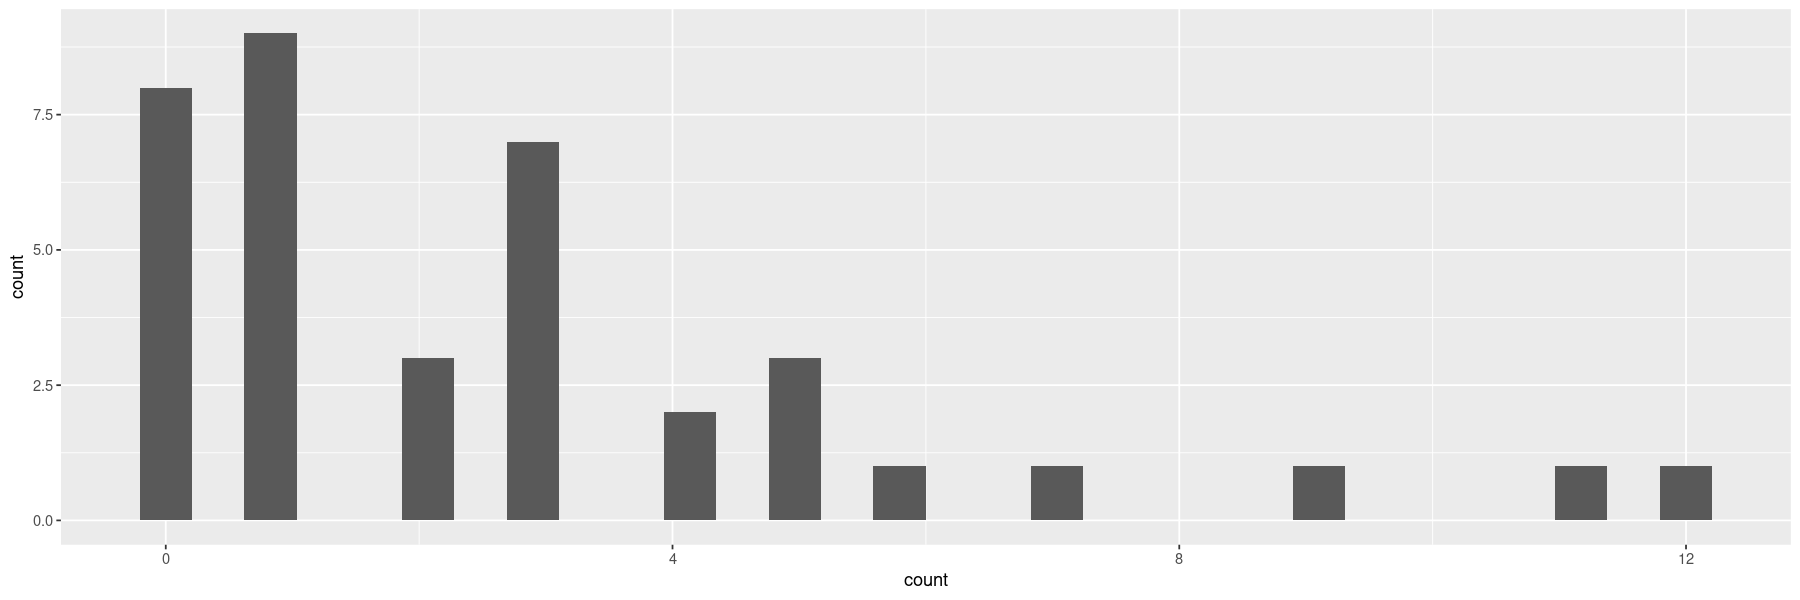

In [4]:
options(repr.plot.width=15, repr.plot.height=5)
ggplot( bald_eagles, aes(x=count) ) + geom_histogram()

### b)

On a linear scale:

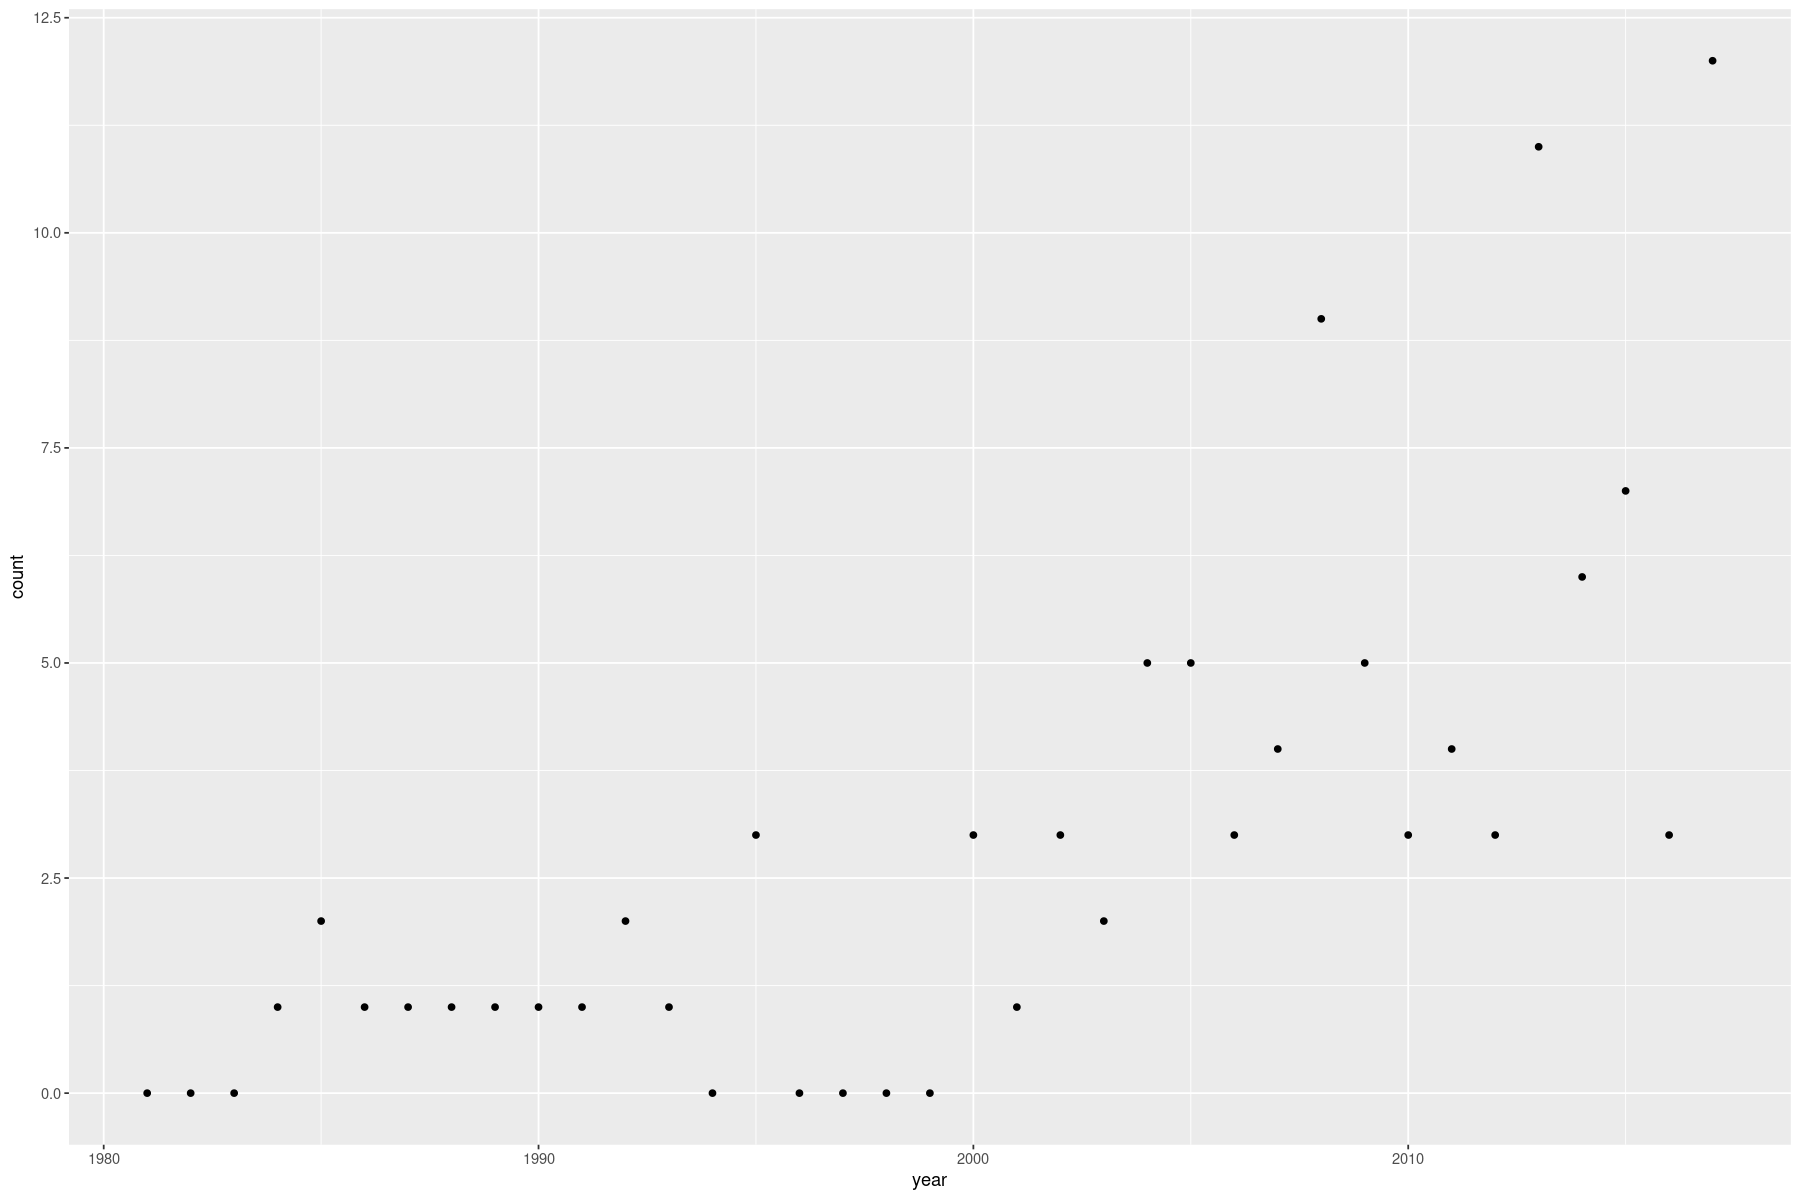

In [5]:
options(repr.plot.width=15, repr.plot.height=10)
ggplot( bald_eagles, aes(x=year, y=count) ) + geom_point()

Since some counts are zero, plotting on a logarithmic scale is not possible. It looks like as if there is some kind of heteroscedastic non-linear relationship with count and year.

### c)

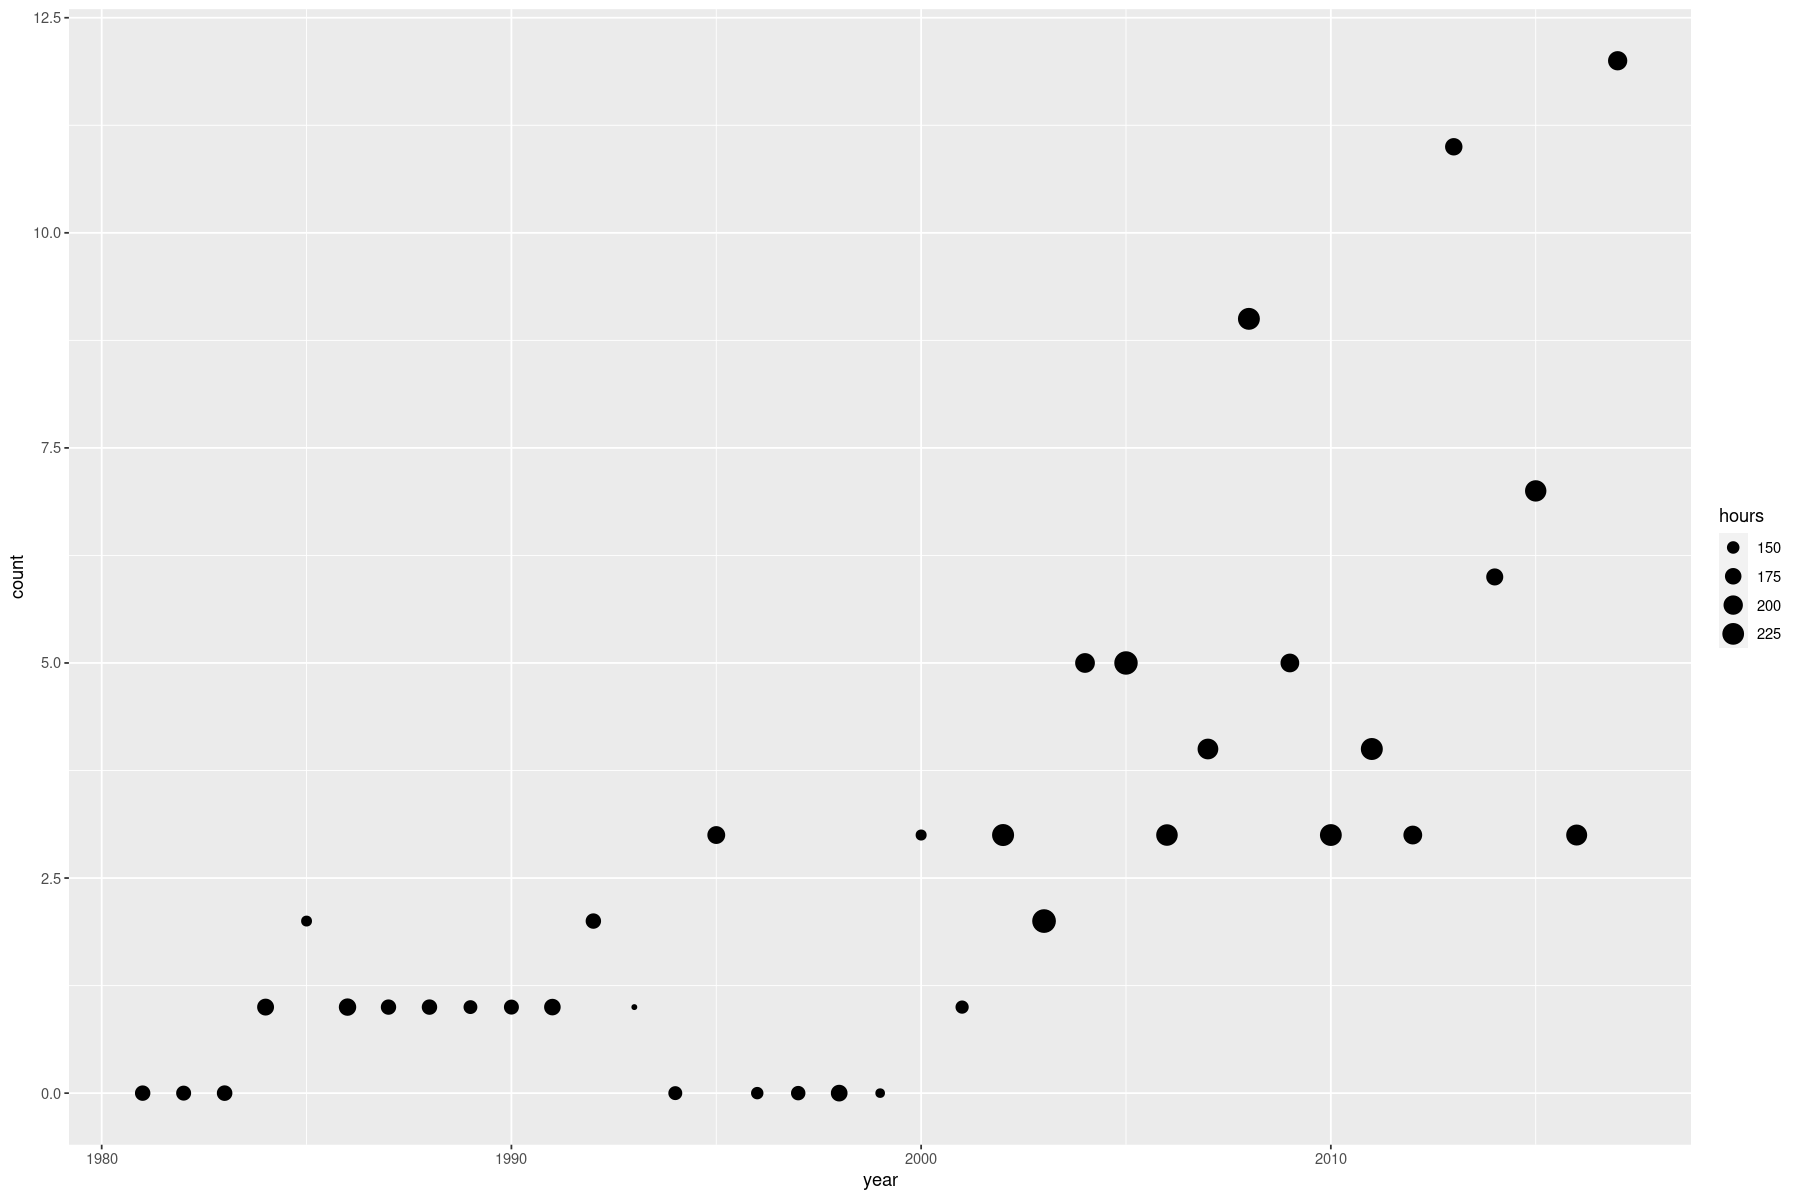

In [6]:
ggplot( bald_eagles, aes(x=year, y=count, size=hours) ) + geom_point()

Of course the number of counts correlates with the observing time.

## Exercise 12.6

### a)

In [7]:
eagle_model_1 <- stan_glm(count ~ year + hours,
                                data = bald_eagles, 
                                family = gaussian,
                                prior_intercept = normal(5,autoscale=TRUE),
                                prior = normal(0, 2.5, autoscale = TRUE),
                                prior_aux = exponential(1, autoscale = TRUE),
                                chains = 4, iter = 5000*2, seed = 84735)


SAMPLING FOR MODEL 'continuous' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 1.5e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.15 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.067305 seconds (Warm-up)
Chain 1:                0.07726 seconds (Sampling)
Chain 1:  

In [8]:
prior_summary( eagle_model_1 )

Priors for model 'eagle_model_1' 
------
Intercept (after predictors centered)
  Specified prior:
    ~ normal(location = 5, scale = 2.5)
  Adjusted prior:
    ~ normal(location = 5, scale = 7.6)

Coefficients
  Specified prior:
    ~ normal(location = [0,0], scale = [2.5,2.5])
  Adjusted prior:
    ~ normal(location = [0,0], scale = [0.70,0.24])

Auxiliary (sigma)
  Specified prior:
    ~ exponential(rate = 1)
  Adjusted prior:
    ~ exponential(rate = 0.33)
------
See help('prior_summary.stanreg') for more details

### b)

$$Y_i|\beta_0,\beta_1,\beta_2 \sim N(\mu_i, \sigma), \; \; \mu_i = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i}$$

$$\beta_0 \sim N(5, 7.6^2)$$

$$\beta_1 \sim N(0, 0.7^2)$$

$$\beta_2 \sim N(0, 0.24^2)$$

$$\sigma \sim \text{Exp}(0.33)$$

### c)

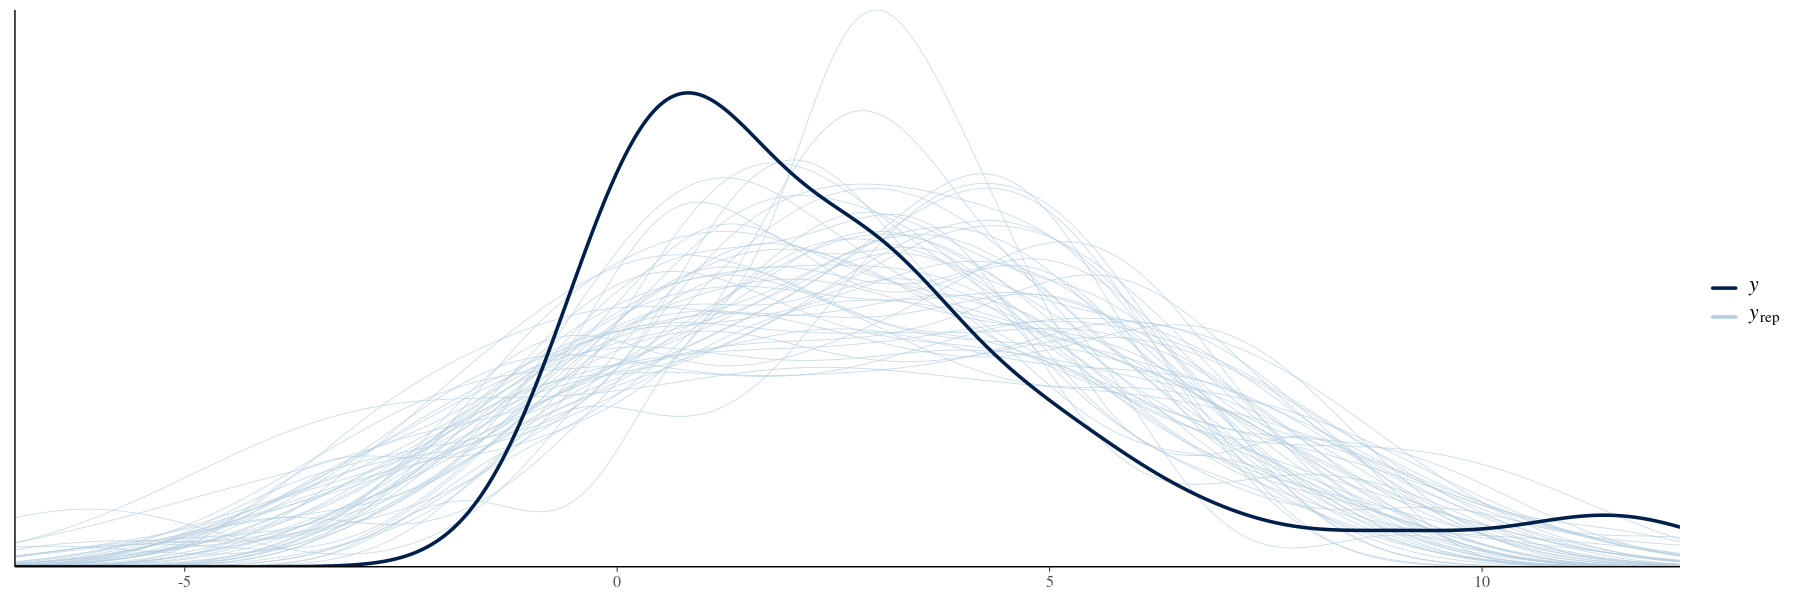

In [9]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check( eagle_model_1 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


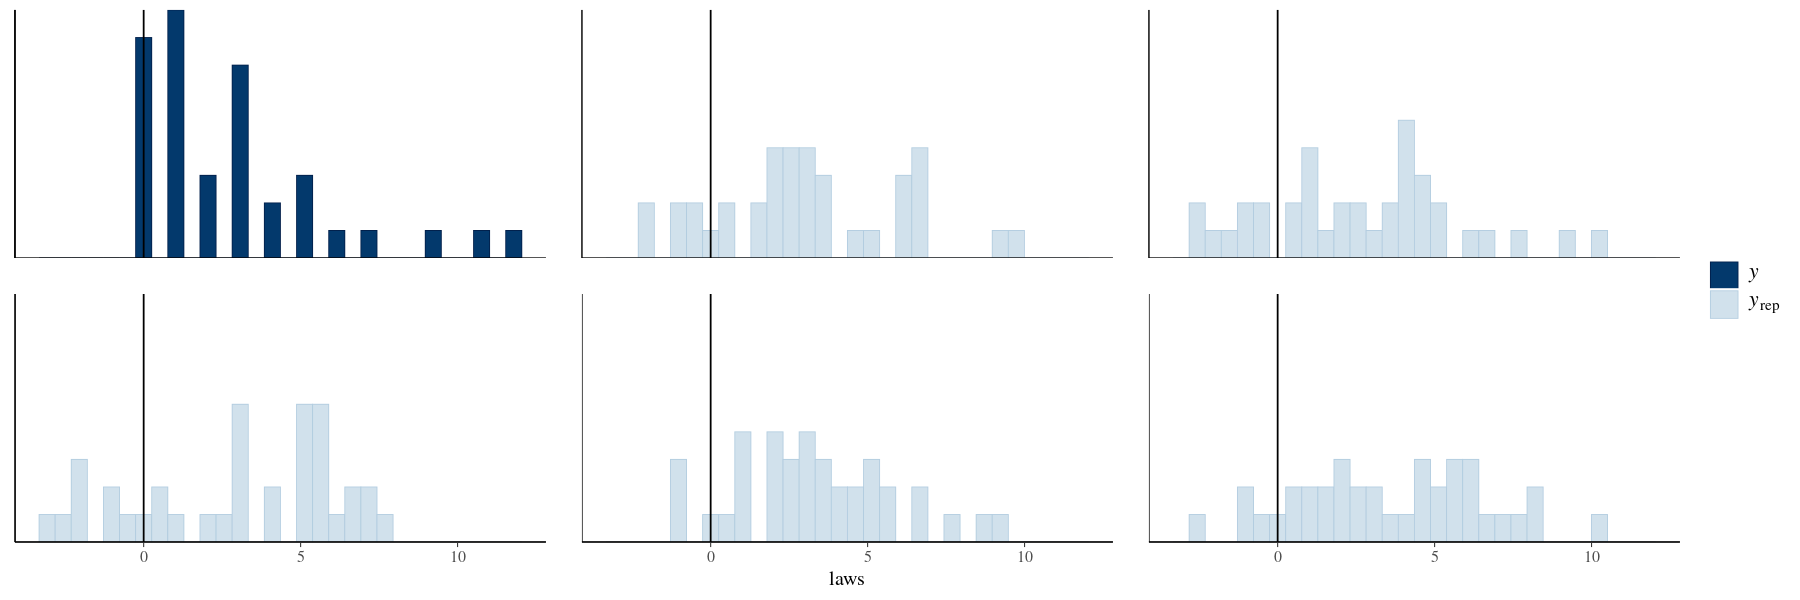

In [10]:
pp_check(eagle_model_1, plotfun = "hist", nreps = 5) + geom_vline(xintercept = 0) + xlab("laws")

The predicted distribution looks very different from the data distribution. The assumption of a normal distribution for the conditional outcome is wrong and consequently the model bad.

## Exercise 12.7

### a)

We are dealing with count data that is always positive. The normal model can produce positive as well as negative numbers. Moreover, variance increases with counts while the normal model assumes constant variance.

### b)

Prior:

In [11]:
log(5)

[1] 1.609438

In [12]:
exp(3)

[1] 20.08554

In [13]:
exp(0)

[1] 1

In [14]:
eagle_model_2 <- stan_glm(count ~ year + hours,
                                data = bald_eagles, 
                                family = poisson,
                                prior_intercept = normal(1.6, 1.5, autoscale=TRUE),
                                prior = normal(0, 2.5, autoscale = TRUE),
                                prior_aux = exponential(1, autoscale = TRUE),
                                chains = 4, iter = 5000*2, seed = 84735)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.24 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.085831 seconds (Warm-up)
Chain 1:                0.099828 seconds (Sampling)
Chain 1:      

In [15]:
prior_summary( eagle_model_2 )

Priors for model 'eagle_model_2' 
------
Intercept (after predictors centered)
 ~ normal(location = 1.6, scale = 1.5)

Coefficients
  Specified prior:
    ~ normal(location = [0,0], scale = [2.5,2.5])
  Adjusted prior:
    ~ normal(location = [0,0], scale = [0.23,0.08])
------
See help('prior_summary.stanreg') for more details

### c)

$$Y_i|\beta_0,\beta_1,\beta_2 \sim Pois(\lambda_i), \; \; \log(\lambda_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i}$$

$$\beta_0 \sim N(1.6, 1.5^2)$$

$$\beta_1 \sim N(0, 0.23^2)$$

$$\beta_2 \sim N(0, 0.08^2)$$

### d)

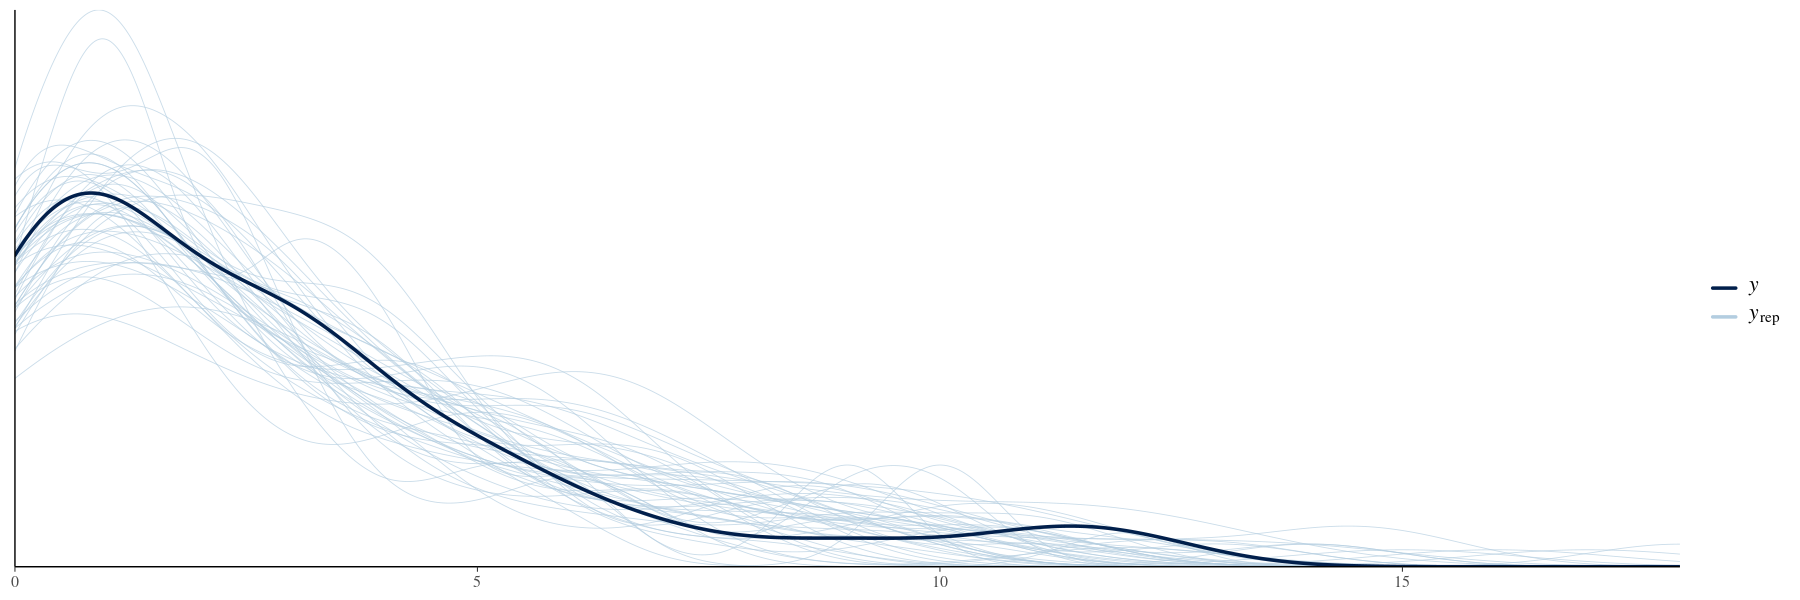

In [16]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check( eagle_model_2 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


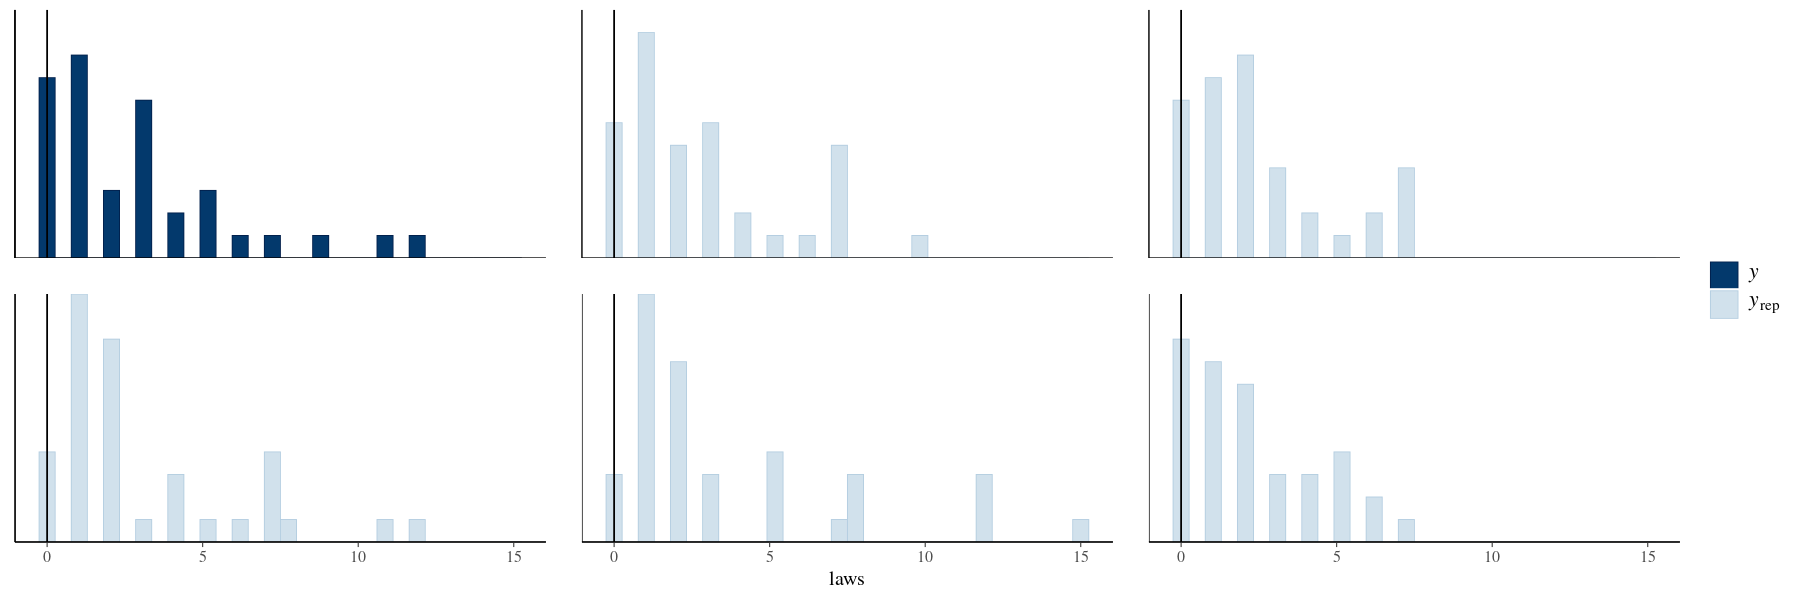

In [17]:
pp_check(eagle_model_2, plotfun = "hist", nreps = 5) + geom_vline(xintercept = 0) + xlab("laws")

The model's predictions are now much closer to the data! From first sight I would say this is a good model.

## Exercise 12.8

### a)

In [18]:
eagle_model_3 <- stan_glm(count ~ year + hours,
                                data = bald_eagles, 
                                family = neg_binomial_2,
                                prior_intercept = normal(1.6, 1.5, autoscale=TRUE),
                                prior = normal(0, 2.5, autoscale = TRUE),
                                prior_aux = exponential(1, autoscale = TRUE),
                                chains = 4, iter = 5000*2, seed = 84735)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 2e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.2 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.159731 seconds (Warm-up)
Chain 1:                0.180479 seconds (Sampling)
Chain 1:         

In [19]:
prior_summary( eagle_model_3 )

Priors for model 'eagle_model_3' 
------
Intercept (after predictors centered)
 ~ normal(location = 1.6, scale = 1.5)

Coefficients
  Specified prior:
    ~ normal(location = [0,0], scale = [2.5,2.5])
  Adjusted prior:
    ~ normal(location = [0,0], scale = [0.23,0.08])

Auxiliary (reciprocal_dispersion)
 ~ exponential(rate = 1)
------
See help('prior_summary.stanreg') for more details

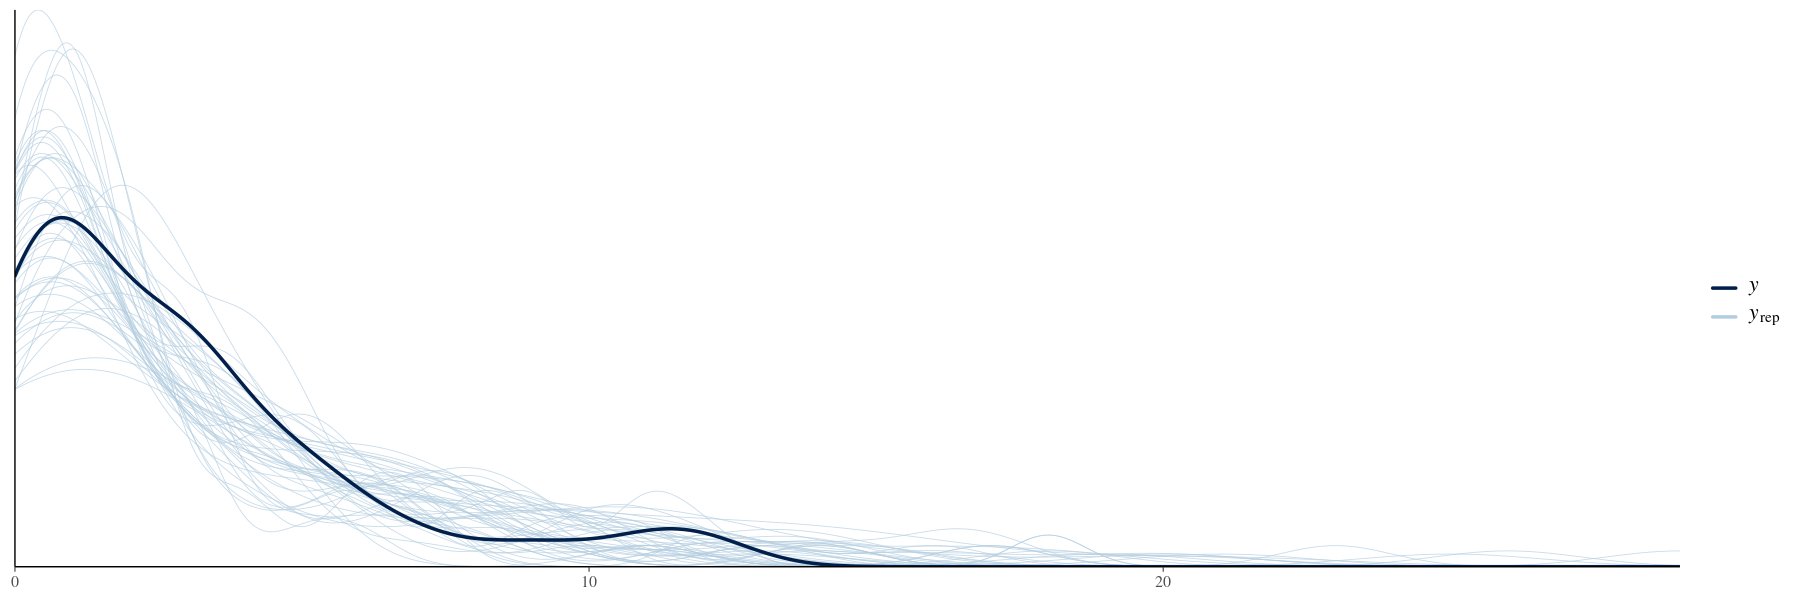

In [20]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check( eagle_model_3 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


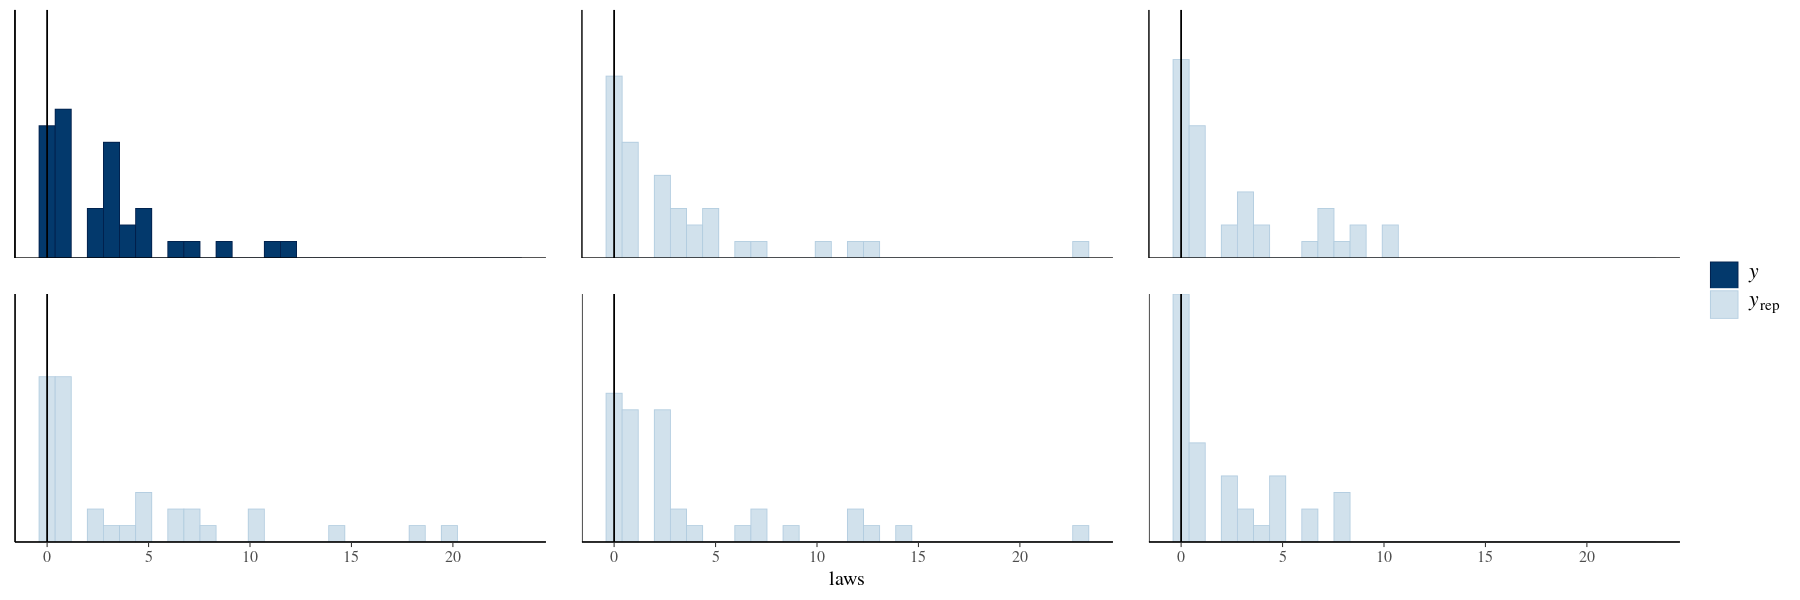

In [21]:
pp_check(eagle_model_3, plotfun = "hist", nreps = 5) + geom_vline(xintercept = 0) + xlab("laws")

In the predictive check, the model does not really look better than the Poisson model.

## b)

$$Y_i|\beta_0,\beta_1,\beta_2 \sim NegBin(\lambda_i, r), \; \; \log(\lambda_i) = \beta_0 + \beta_1 X_{1i} + \beta_2 X_{2i}$$

$$\beta_0 \sim N(1.6, 1.5^2)$$

$$\beta_1 \sim N(0, 0.23^2)$$

$$\beta_2 \sim N(0, 0.08^2)$$

$$r \sim \text{Exp}(1)$$

### c)

In [22]:
tidy(eagle_model_3, conf.int = TRUE, conf.level = 0.80)

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.532077e+02,35.031577743,-1.995370e+02,-109.19295421
year,7.654519e-02,0.017739246,5.419963e-02,0.09994110
hours,4.797928e-03,0.005613219,-2.318021e-03,0.01210224


Multiplification factor per increase in year:

In [23]:
exp( 7.654519e-02 )

[1] 1.079551

After every year, around 8% more eagles were counted.

For observation hours:

In [24]:
exp( 4.797928e-03 )

[1] 1.004809

On average, for every more observation hour 0.5% more eagles are spotted.

### d)

In [25]:
tidy(eagle_model_3, conf.int = TRUE, conf.level = 0.95)

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.532077e+02,35.031577743,-225.64007767,-85.34935273
year,7.654519e-02,0.017739246,0.04212989,0.11321768
hours,4.797928e-03,0.005613219,-0.00608372,0.01620139


The coefficient for year is with a plausibility of 95% in the interval [0.042,0.113].

### e)

Yes, the coefficient for 'year' is significantly above zero. 

### Extra: How much better is the negative binomial model?

In [26]:
poisson_cv <- prediction_summary_cv(model = eagle_model_2, data = bald_eagles, k = 10)
poisson_cv$cv

mae,mae_scaled,within_50,within_95
<dbl>,<dbl>,<dbl>,<dbl>
1.106823,0.7485896,0.6083333,0.95


In [27]:
negbinom_cv <- prediction_summary_cv(model = eagle_model_3, data = bald_eagles, k = 10)
negbinom_cv$cv

mae,mae_scaled,within_50,within_95
<dbl>,<dbl>,<dbl>,<dbl>
1.133128,0.5783539,0.7583333,1


In [28]:
set.seed(84735)
loo_1 <- loo(eagle_model_2)
loo_2 <- loo(eagle_model_3)
c(loo_1$estimates[1], loo_2$estimates[1])

[1] -66.64847 -67.72417

I would choose the Poisson model here, since the more complex negative binomial model does not seem to bring any advantages in terms of prediction.

## Exercise 12.9

### a)

The bald eagles were probably not directly hurt during the observation periods, however it should be checked whether they were not disturbed in their natural habitat through the observers entering their territory.

### b)

See 12.8

### c)

See 12.8

## Exercise 12.10

### Explore

In [29]:
head(airbnb_small)

,price,rating,reviews,room_type,accommodates,bedrooms,minimum_stay,neighborhood,district,walk_score,transit_score,bike_score
,<int>,<dbl>,<int>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<int>,<int>,<int>
1,85,5.0,6,Private room,2,1,1,Albany Park,Far North,87,62,68
2,35,5.0,8,Private room,1,1,1,Albany Park,Far North,87,62,68
3,175,4.5,7,Entire home/apt,4,2,2,Albany Park,Far North,87,62,68
4,75,5.0,52,Private room,2,1,1,Albany Park,Far North,87,62,68
5,160,5.0,3,Entire home/apt,6,2,1,Albany Park,Far North,87,62,68
6,60,5.0,5,Private room,1,1,1,Albany Park,Far North,87,62,68


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


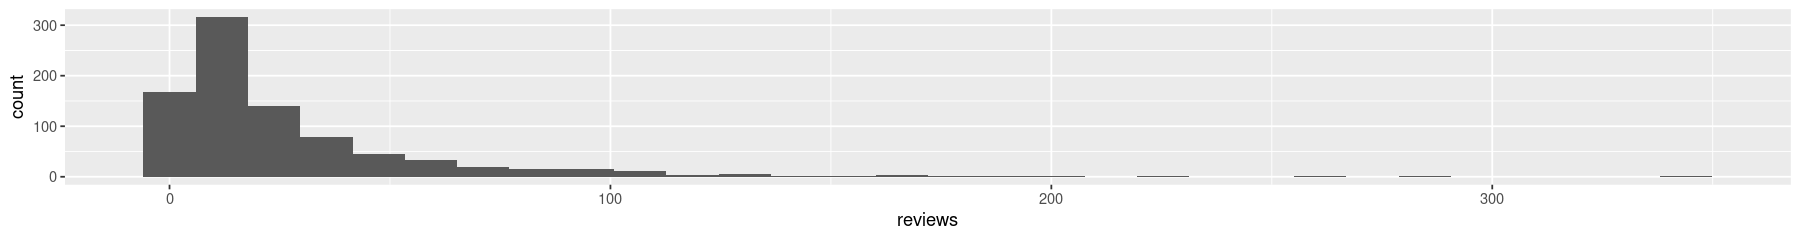

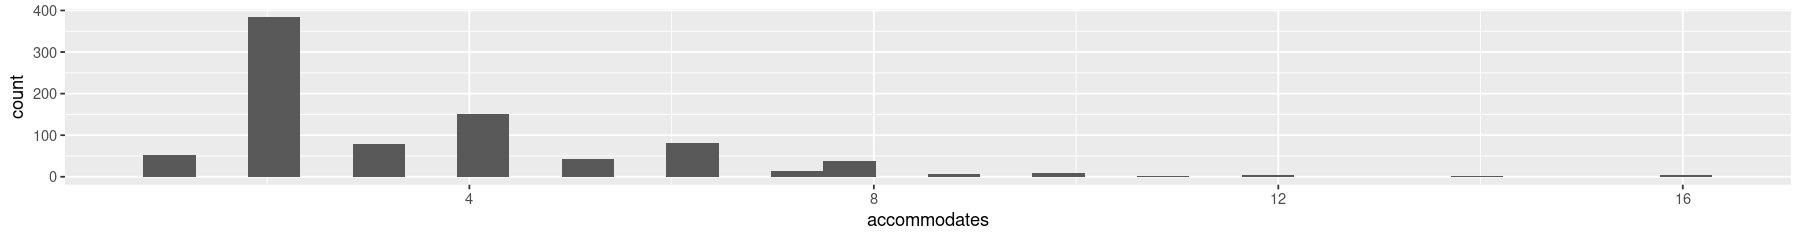

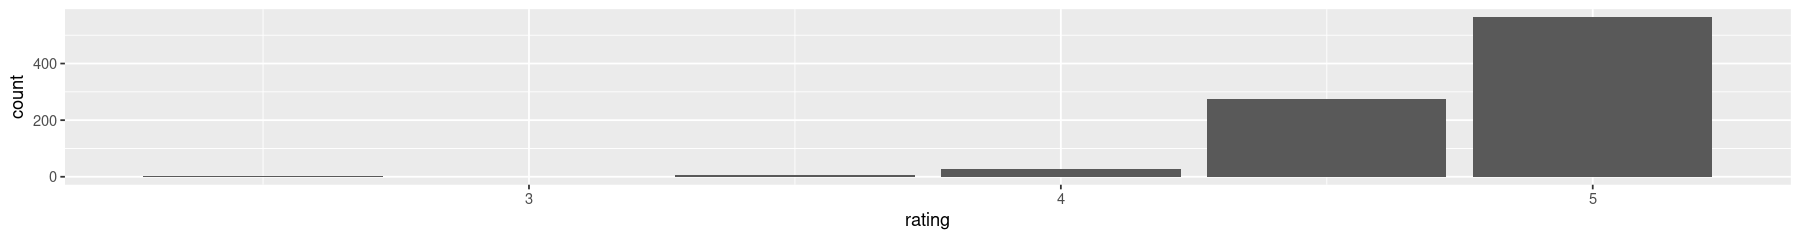

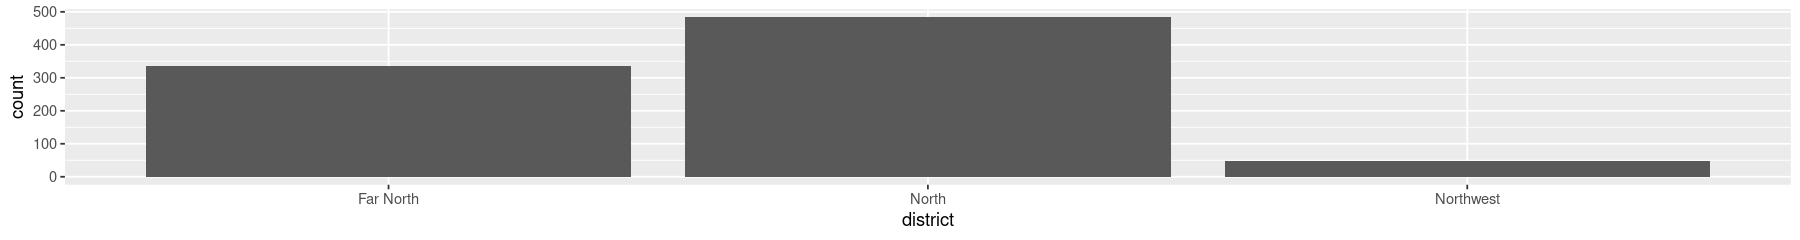

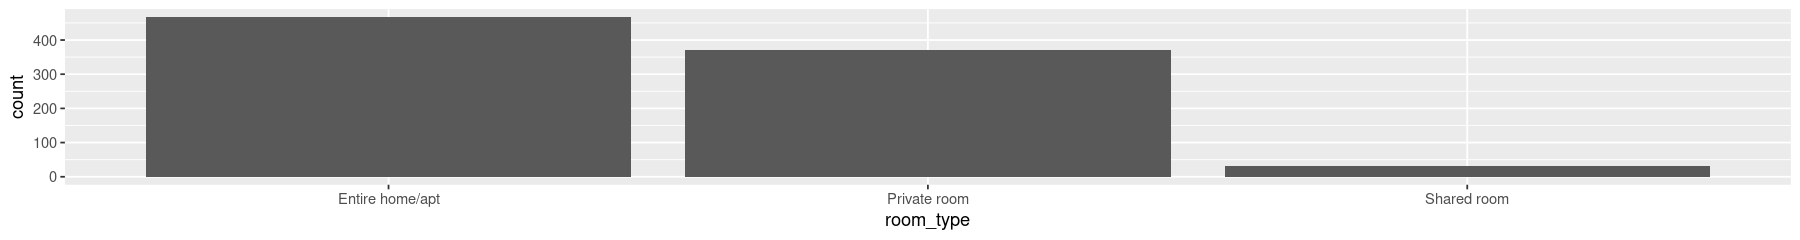

In [30]:
options(repr.plot.width=15, repr.plot.height=2)
ggplot( airbnb_small, aes(x=reviews) ) + geom_histogram()
ggplot( airbnb_small, aes(x=accommodates) ) + geom_histogram()
ggplot( airbnb_small, aes(x=rating) ) + geom_bar()
ggplot( airbnb_small, aes(x=district) ) + geom_bar()
ggplot( airbnb_small, aes(x=room_type) ) + geom_bar()

### Fit a Poisson regression model

Choice for center of prior for $\beta_0$:

In [31]:
c( exp(1), exp(2), exp(3) )

[1]  2.718282  7.389056 20.085537

In [32]:
airbnb_model_1 <- stan_glm(reviews ~ accommodates + rating + district + room_type,
                                data = airbnb_small, 
                                family = poisson,
                                prior_intercept = normal(2, 1, autoscale=TRUE),
                                prior = normal(0, 2.5, autoscale = TRUE),
                                prior_aux = exponential(1, autoscale = TRUE),
                                chains = 4, iter = 5000*2, seed = 84735)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 4.6e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.46 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 1.38511 seconds (Warm-up)
Chain 1:                1.59116 seconds (Sampling)
Chain 1:        

Predictive check:

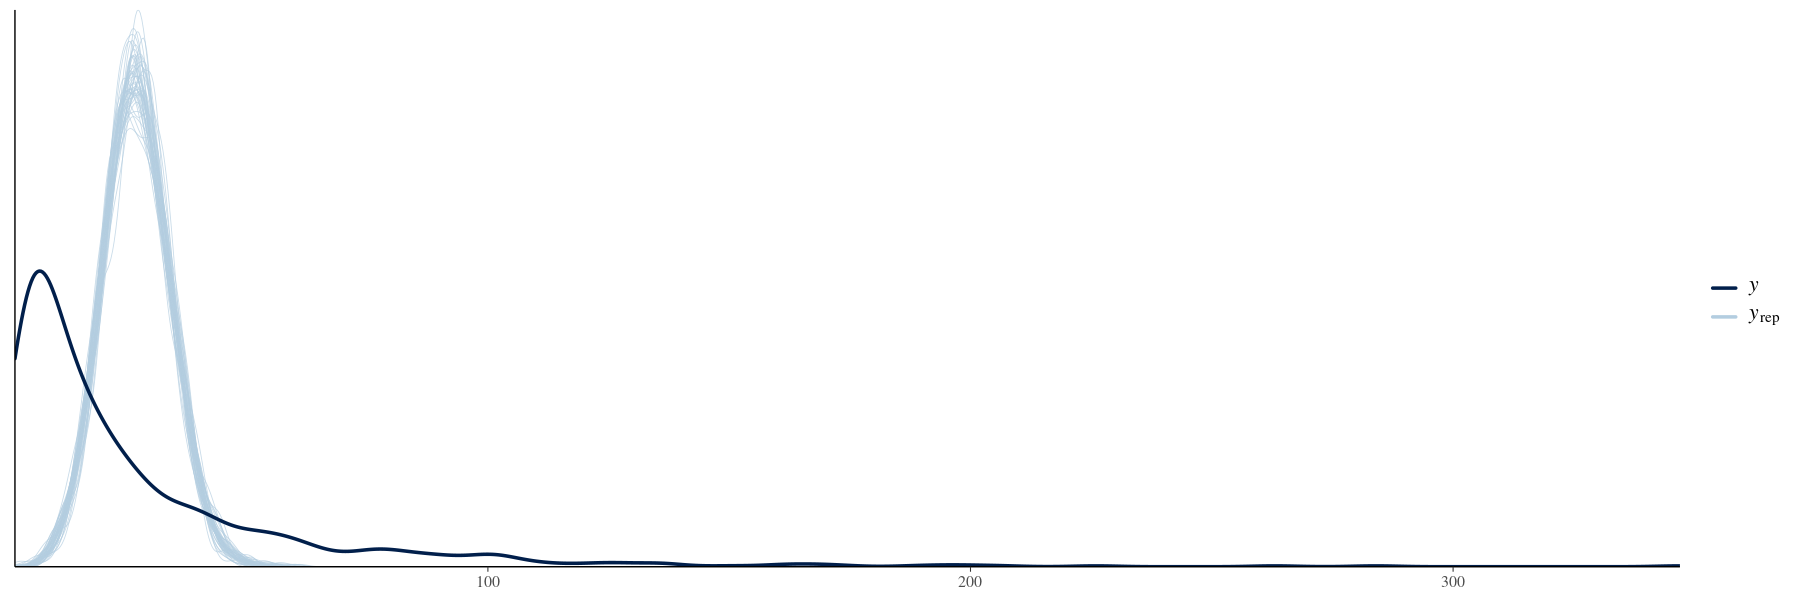

In [33]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check( airbnb_model_1 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


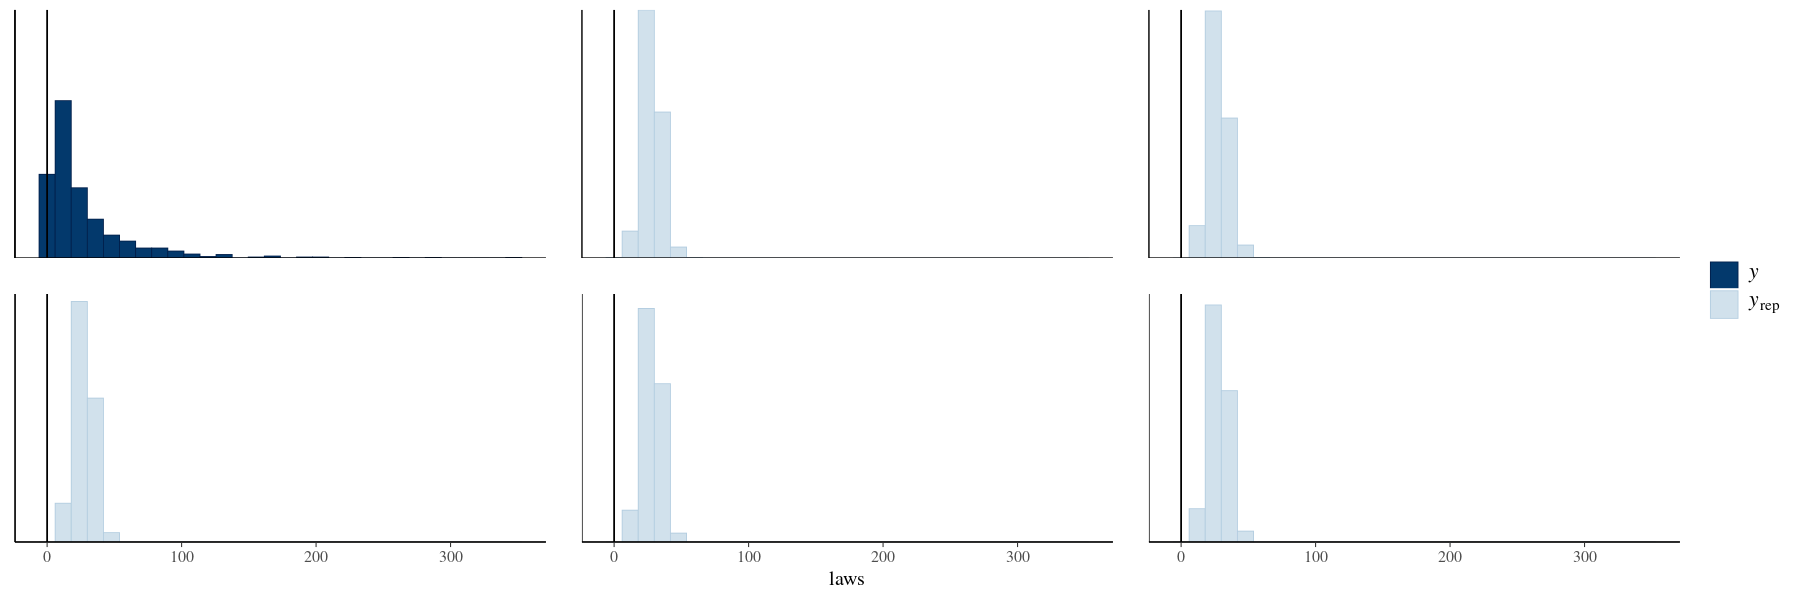

In [34]:
pp_check(airbnb_model_1, plotfun = "hist", nreps = 5) + geom_vline(xintercept = 0) + xlab("laws")

Does not fit at all. Try with overdispersion next.

### Fit a Negative Binomial model

In [35]:
airbnb_model_2 <- stan_glm(reviews ~ accommodates + rating + district + room_type,
                                data = airbnb_small, 
                                family = neg_binomial_2,
                                prior_intercept = normal(2, 1, autoscale=TRUE),
                                prior = normal(0, 2.5, autoscale = TRUE),
                                prior_aux = exponential(1, autoscale = TRUE),
                                chains = 4, iter = 5000*2, seed = 84735)


SAMPLING FOR MODEL 'count' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9.3e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.93 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 10000 [  0%]  (Warmup)
Chain 1: Iteration: 1000 / 10000 [ 10%]  (Warmup)
Chain 1: Iteration: 2000 / 10000 [ 20%]  (Warmup)
Chain 1: Iteration: 3000 / 10000 [ 30%]  (Warmup)
Chain 1: Iteration: 4000 / 10000 [ 40%]  (Warmup)
Chain 1: Iteration: 5000 / 10000 [ 50%]  (Warmup)
Chain 1: Iteration: 5001 / 10000 [ 50%]  (Sampling)
Chain 1: Iteration: 6000 / 10000 [ 60%]  (Sampling)
Chain 1: Iteration: 7000 / 10000 [ 70%]  (Sampling)
Chain 1: Iteration: 8000 / 10000 [ 80%]  (Sampling)
Chain 1: Iteration: 9000 / 10000 [ 90%]  (Sampling)
Chain 1: Iteration: 10000 / 10000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 3.47005 seconds (Warm-up)
Chain 1:                4.91357 seconds (Sampling)
Chain 1:        

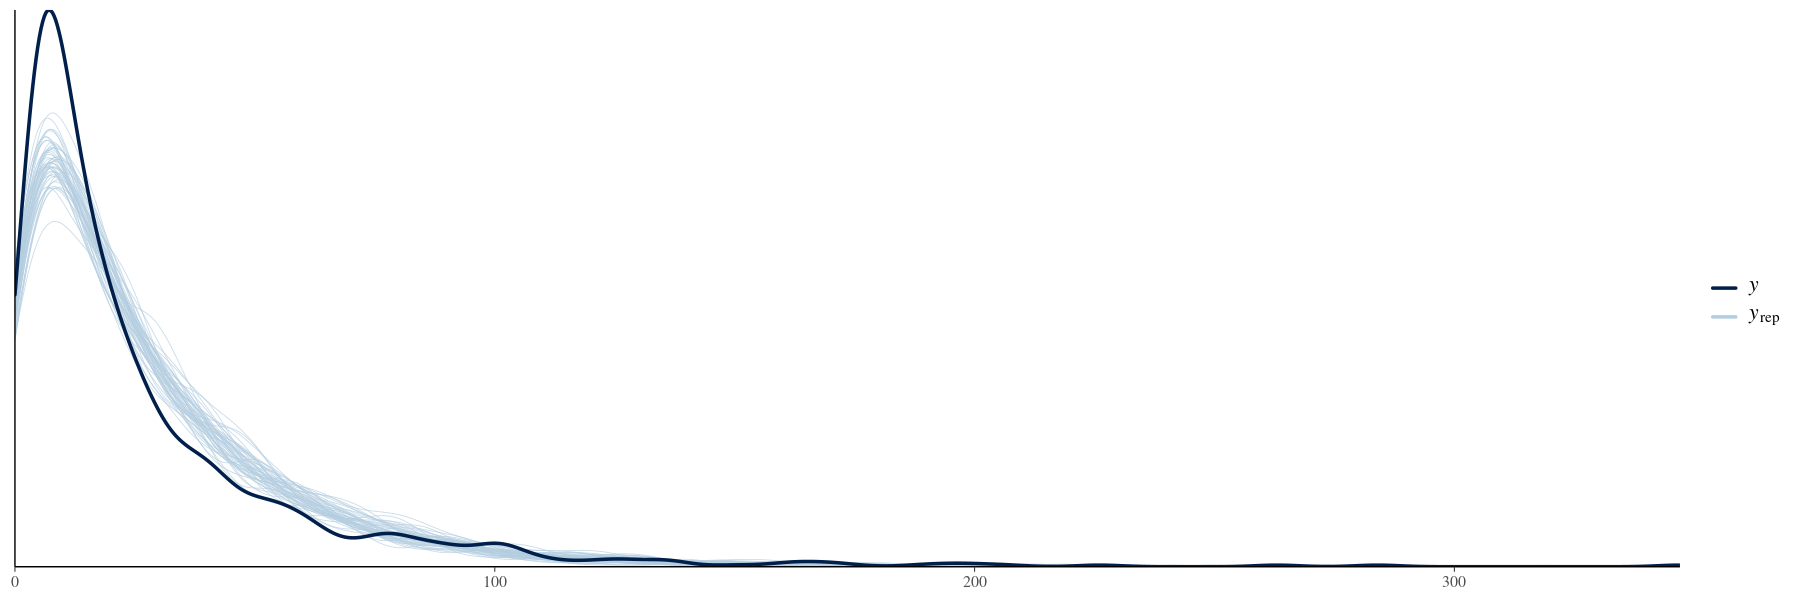

In [36]:
options(repr.plot.width=15, repr.plot.height=5)
pp_check( airbnb_model_2 )

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


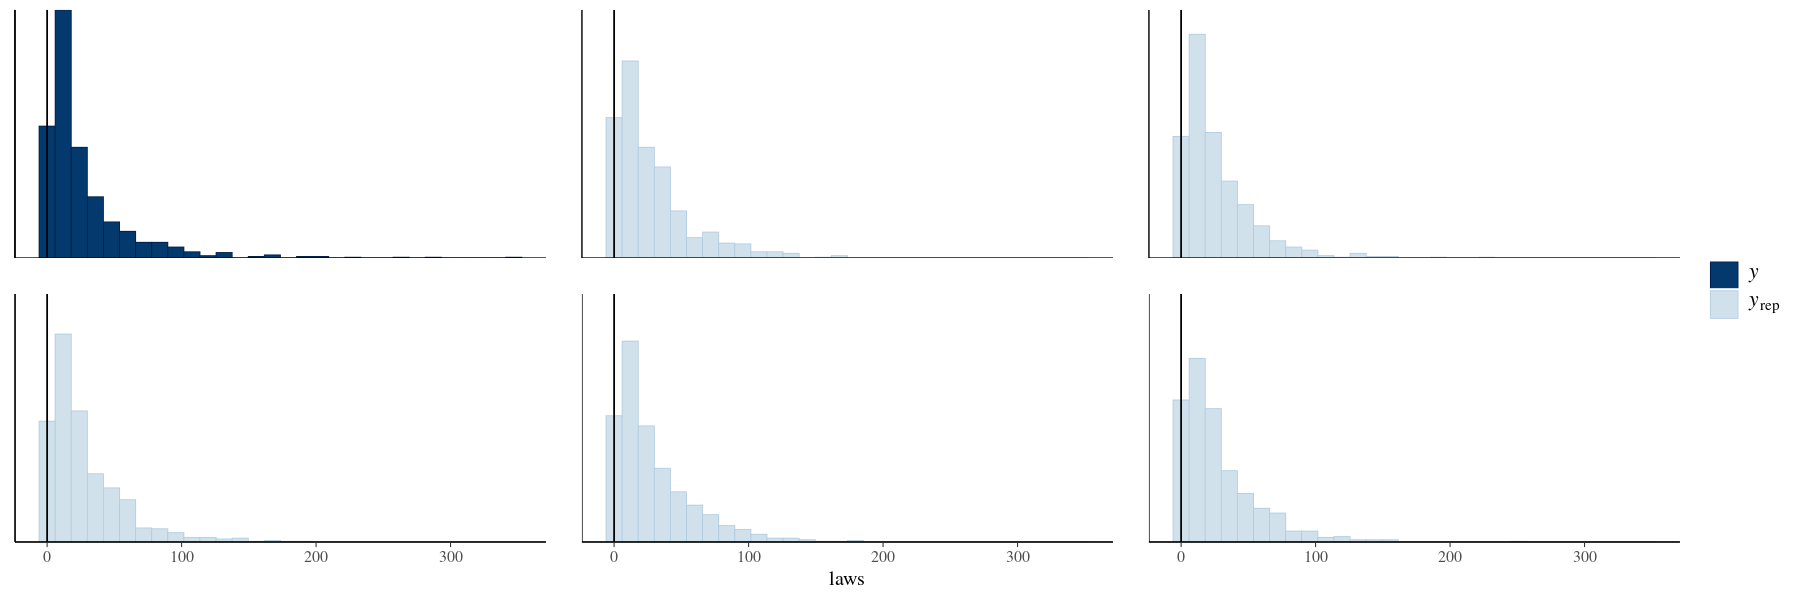

In [37]:
pp_check(airbnb_model_2, plotfun = "hist", nreps = 5) + geom_vline(xintercept = 0) + xlab("laws")

Not perfect, but much better.

Cross-validated performance (k=10 is quite slow, maybe use a smaller k):

In [38]:
negbinom_cv <- prediction_summary_cv(model = airbnb_model_2, data = airbnb_small, k = 3)
negbinom_cv$cv

mae,mae_scaled,within_50,within_95
<dbl>,<dbl>,<dbl>,<dbl>
18.01113,0.6833882,0.5017301,0.9643241


The mae is 17 .. not too bad actually.

Summary of posterior parameters:

In [39]:
tidy(airbnb_model_2, conf.int = TRUE, conf.level = 0.80)

term,estimate,std.error,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),1.80921680,0.57533423,1.06851733,2.55762026
accommodates,0.04442849,0.01754062,0.02213851,0.06745466
rating,0.24008361,0.11832098,0.08601115,0.39211780
districtNorth,0.18501316,0.06894773,0.09639786,0.27350476
districtNorthwest,-0.16903179,0.15275969,-0.36187235,0.03232308
room_typePrivate room,0.22358860,0.08068070,0.11984395,0.32788565
room_typeShared room,-0.43637577,0.18533235,-0.66953994,-0.19664230


Interpretation:

In [40]:
exp(0.04)

[1] 1.040811

4% more reviews per number of people it accommodates.

In [41]:
exp(0.24)

[1] 1.271249

27% more reviews per star rating.

In [42]:
exp(0.185)

[1] 1.203218

20% more reviews for north district compared to far north.

In [43]:
1-exp(-0.169)

[1] 0.1554911

15.5% less reviews for northwest district compared to far north.

In [44]:
exp(0.22)

[1] 1.246077

24% more reviews for private rooms compared with entire appartements.

In [45]:
1-exp(-0.43)

[1] 0.3494909

And 35% less reviews for shared rooms compared with entire appartements.